In [4]:
import os, sys
import re
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
from collections import defaultdict
import nltk
import math
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import load_iris
from sklearn import tree
import datetime
import time;
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import pandas
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import io
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
# iccid,imei,imsi, mac address, android id, android advertiser id, device_id
# name , gender, dob, relation ship status, email address, phone number, address book infromation
# GPS lattitude longitude, zip code
# username, password

In [5]:
class NaiveBayes:
    def __init__(self):
        self.d0 = defaultdict(lambda:0)
        self.d1 = defaultdict(lambda:0)
        self.d = defaultdict(lambda:0)
        self.prior0 = 0.0
        self.prior1 = 0.0
        self.c0 = 0
        self.c1 = 0
    def train(self,text,label):
        
        self.prior0 = len(label[label==0]) / len(label)
        self.prior1 = len(label[label==1]) / len(label)  
        #print(self.prior0,'\n',self.prior1)
        
        i=0
        for t in text:
            if label[i]==0:
                for w in t:
                    self.d0[w]+=1
                    self.d[w]+=1
                    self.c0+=1
            else:
                for w in t:
                    self.d1[w]+=1
                    self.d[w]+=1
                    self.c1+=1
            i+=1
                    
    def test(self,texts):
        
        l = []
        vocab = len(self.d)
        for words in texts:
            #print("\n\npacket:\n",words)
            L0 = 0.0
            L1 = 0.0
            for w in words:
                #print ("WORD: ",w)
                L0 += math.log( (self.d0[w]+1) / ( self.c0 + vocab ) )
                L1 += math.log( (self.d1[w]+1) / ( self.c1 + vocab ) )
                #print("0: ",self.d0[w],L0)
                #print('1: ',self.d1[w],L1)
            #print('likeli: ',L0,'  ',L1)
            p0 = L0#self.prior0 * L0
            p1 = L1#self.prior1 * L1
            #print("Final prob: ",p0,'  ',p1)
            if p0>=p1:
                l.append(0)
            else:
                l.append(1)
            #a=input("waiting...")
        return np.array(l)

# Reading data and storing inside pandas dataframe

In [6]:
packets = None
i=0
total=0
for filename in os.listdir('android/'):
    
    #print('============================'+filename+'============================')
    d = pd.read_json('android/'+filename)
    df = pd.DataFrame.from_dict(d)
    df=df.T
    total+=len(df)
    if i==0:
        packets=df
    else:
        packets=packets.append(df)
    i+=1

In [7]:
packets.head()

domain          dst_ip dst_port  \
1441732720.983903,CM3FTd40SQh7c7PFy2    google.com  173.194.123.41       80   
1441732727.668109,CgBEiD2CL4UqmU3f1a    ad-x.co.uk   178.250.2.115       80   
1441732728.224882,CQpyFL1NF7Wiws69Pl     adobe.com     23.0.160.49       80   
1441732728.227854,C6mUOQvDZkTBBmwmi      adobe.com     23.62.6.203       80   
1441732728.232430,CGVW26MOa9euoEMw4   mindjolt.com     23.15.7.139       80   

                                                                                headers  \
1441732720.983903,CM3FTd40SQh7c7PFy2  {'ACCEPT-ENCODING': 'gzip', 'CONNECTION': 'Kee...   
1441732727.668109,CgBEiD2CL4UqmU3f1a  {'CONNECTION': 'Keep-Alive', 'HOST': 'apps.ad-...   
1441732728.224882,CQpyFL1NF7Wiws69Pl  {'ACCEPT': 'text/xml\x2c application/xml\x2c a...   
1441732728.227854,C6mUOQvDZkTBBmwmi   {'ACCEPT': 'text/xml\x2c application/xml\x2c a...   
1441732728.232430,CGVW26MOa9euoEMw4   {'ACCEPT': 'text/xml\x2c application/xml\x2c a...   

                                                        host is_host_ip label  \
1441732720.983903,CM3FTd40SQh7c7PFy2     clients3.google.com          0     0   
1441732727.668109,CgBEiD2CL4UqmU3f1a         apps.ad-x.co.uk          0     1   
1441732728.224882,CQpyFL1NF7Wiws69Pl      mobiledl.adobe.com          0     0   
1441732728.227854,C6mUOQvDZkTBBmwmi   airdownload2.adobe.com          0     0   
1441732728.232430,CGVW26MOa9euoEMw4       cache.mindjolt.com          0     0   

                                       md5 method              package_name  \
1441732720.983903,CM3FTd40SQh7c7PFy2  None    GET  air.com.sgn.cookiejam.gp   
1441732727.668109,CgBEiD2CL4UqmU3f1a  None    GET  air.com.sgn.cookiejam.gp   
1441732728.224882,CQpyFL1NF7Wiws69Pl  None    GET  air.com.sgn.cookiejam.gp   
1441732728.227854,C6mUOQvDZkTBBmwmi   None    GET  air.com.sgn.cookiejam.gp   
1441732728.232430,CGVW26MOa9euoEMw4   None    GET  air.com.sgn.cookiejam.gp   

                                           pii_types platform post_body  \
1441732720.983903,CM3FTd40SQh7c7PFy2            None  android         -   
1441732727.668109,CgBEiD2CL4UqmU3f1a  [AdvertiserId]  android         -   
1441732728.224882,CQpyFL1NF7Wiws69Pl            None  android         -   
1441732728.227854,C6mUOQvDZkTBBmwmi             None  android         -   
1441732728.232430,CGVW26MOa9euoEMw4             None  android         -   

                                                      referrer     src_ip  \
1441732720.983903,CM3FTd40SQh7c7PFy2                         -  10.11.2.3   
1441732727.668109,CgBEiD2CL4UqmU3f1a                         -  10.11.2.3   
1441732728.224882,CQpyFL1NF7Wiws69Pl                         -  10.11.2.3   
1441732728.227854,C6mUOQvDZkTBBmwmi                          -  10.11.2.3   
1441732728.232430,CGVW26MOa9euoEMw4   app:/release_android.swf  10.11.2.3   

                                     src_port tk_flag                 ts  \
1441732720.983903,CM3FTd40SQh7c7PFy2    56933       1  1441732720.983903   
1441732727.668109,CgBEiD2CL4UqmU3f1a    35582       0  1441732727.668109   
1441732728.224882,CQpyFL1NF7Wiws69Pl    59895       1  1441732728.224882   
1441732728.227854,C6mUOQvDZkTBBmwmi     59446       1  1441732728.227854   
1441732728.232430,CGVW26MOa9euoEMw4     54480       0  1441732728.232430   

                                                                                    uri  \
1441732720.983903,CM3FTd40SQh7c7PFy2                                      /generate_204   
1441732727.668109,CgBEiD2CL4UqmU3f1a  /API/androidevent.php?oursecret=SGN76hgpDP&udi...   
1441732728.224882,CQpyFL1NF7Wiws69Pl  /flashruntime/configs/air/armeabi-v7a/shamu/lm...   
1441732728.227854,C6mUOQvDZkTBBmwmi   /air?version=18.0.0.143&appid=com.sgn.cookieja...   
1441732728.232430,CGVW26MOa9euoEMw4                                    /crossdomain.xml   

                                                                             user_agent  
1441732720.983903,CM3FTd40SQh7c7PFy2  Dalvik/2.1.0 (

# Data Visualizations

In [8]:
o_label=[]
pt = time.time()
for i in range(0,len(packets)):
    row=packets.iloc[i]
    if (row.pii_types==None):
        o_label.append(0)
    else:
        o_label.append(1)
at = time.time()
time_sm = at-pt
o_label=np.array(o_label)
packets['o_pii']=o_label

In [9]:
unique_domains=(np.unique((packets.domain)))

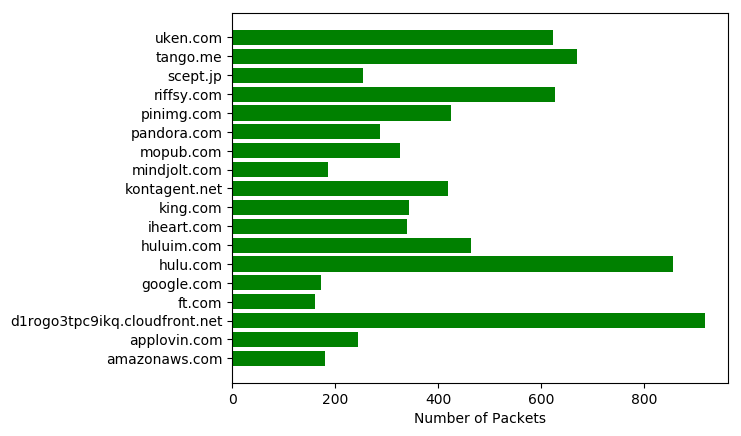

In [10]:
c=0
common_domains = []
num_packets = []
for u in unique_domains:
    num_of_packets = len(packets.domain[packets.domain==u])
    if num_of_packets>150:
        common_domains.append(u)
        num_packets.append(num_of_packets)
common_domains = np.array(common_domains)
num_packets = np.array(num_packets)

plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(common_domains, num_packets, align='center',
        color='green', ecolor='black')
ax.set_xlabel('Number of Packets')
ax.set_title('')

plt.show()

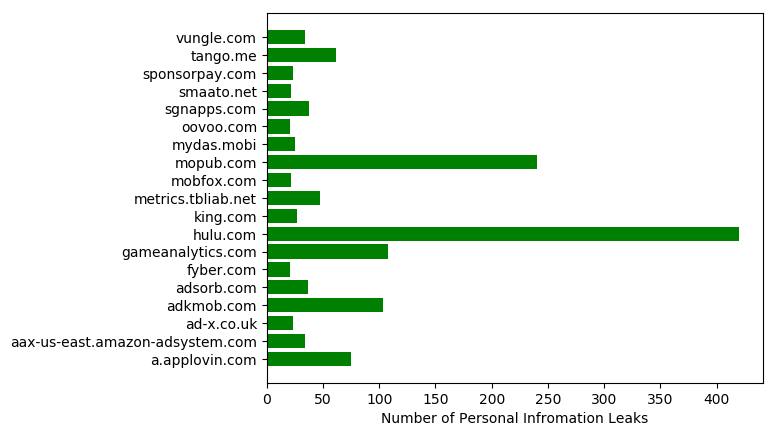

In [11]:
udomains_leaking_pii = (np.unique(packets.domain[packets.o_pii == 1]))
domains_leaking_pii = ((packets.domain[packets.o_pii == 1]))
common_domains_leaking_pii = []
count_of_packets = []
for u in udomains_leaking_pii:
    num_of_packets = len(domains_leaking_pii[domains_leaking_pii==u])
    if num_of_packets>20:
        common_domains_leaking_pii.append(u)
        count_of_packets.append(num_of_packets)
        
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(common_domains_leaking_pii, count_of_packets, align='center',color='green', ecolor='black')
ax.set_xlabel('Number of Personal Infromation Leaks')
ax.set_title('')

plt.show()

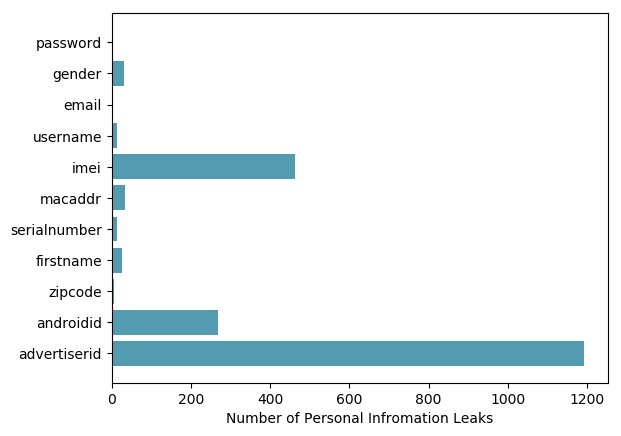

In [12]:
piid = defaultdict(lambda:0)
piis = packets.pii_types[packets.o_pii==1]
piis[0][0]
for i in piis:
    for j in i:
        piid[j.lower()]+=1
        
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh((list(piid.keys())), (list(piid.values())), align='center',color='#539caf', ecolor='black')
ax.set_xlabel('Number of Personal Infromation Leaks')
ax.set_title('')

plt.show()

# Assigning labels to data packets
# Using String Matching

In [13]:
sm_label=[]

In [14]:
for uri in packets.uri:
    uri=uri.lower()
    token = re.split('&',uri)
    chk=re.findall('mac.?address|imei|iccid|imsi|android.?id|advertiser.?id|gender|latitude|longitude|zip.?code|user.?name|password|email|firstname|macaddr|serialnumber',uri)
    chk=np.array(chk)
    chk2=0
    if (len(chk)>0):
        chk2=0
        for pi in np.unique(chk):
            for t in token:
                ind=t.find(pi)+len(pi)
                if ind+8 < len(t):
                    chk2=1
                    break
            if chk2==1:
                break
    if (chk2==1):
        sm_label.append(1)
    else:
        sm_label.append(0)

In [15]:
sm_label=np.array(sm_label)

In [16]:
stringMatching_cm = confusion_matrix(o_label,sm_label)
stringMatching_cm = pandas.DataFrame(stringMatching_cm, ['Non-PII','PII'], ['Non-PII','PII'])

In [17]:
stringMatching_acc = (len(o_label[o_label==sm_label])/len(o_label))

In [18]:
stringMatching_f1 = f1_score(o_label,sm_label)

In [19]:
prec_sm = average_precision_score(o_label,sm_label)
rec_sm = recall_score(o_label,sm_label)

# Obtaining Words From Data Packets

In [20]:
def text_to_words(raw_data):
    wrds = []
    tokens = re.split(",|\t|/|\\||\\*|!|#|&|\\?|\n|;|\\{|\\}|\\(|\\)| ",raw_data)
    #print("BEFORE ::::::::: ",tokens)
    for i in range(0,len(tokens)):
        t = tokens[i]
        t=t.strip()
        #print ("TOKEN UTHAYA HA: ",t)
        if (len(t) < 1):
            continue
        t=re.sub("\"|\'|\\[|\\]|http://|https://|ftp://","",t)
        isval = True
        if (':' in t and '=' not in t):
            t.replace(':', '=', 1)
        if ('=' in t):
            tsplit = re.split('=',t)
            #print ("SPLITS HAIN: ", tsplit)
            if len(tsplit)>1 and '' not in tsplit:
                isval = False
                reconk = tsplit[0]
                reconv = tsplit[1].strip()
                #print("P YA HA:",reconv)
                if (reconv[-1]==':' or reconv[-1]=='-' or reconv[-1]=='='):
                    reconv = reconv[0:len(reconv)]
                #print("YA HA:",reconv)
                if (reconv[0]=='>'):
                    reconv = reconv[1:]
                if len(reconk)>=1:
                    wrds.append(reconk)
                if len(reconv)>=1:
                    wrds.append(reconv)
            elif len(tsplit) == 1:
                t = tsplit[0]
        if (isval):
            t=t.strip()
            if (len(t)==0):
                continue
            if len(t) == 1:
                tmpt = t[0]
                if (tmpt.isdigit==False and tmpt.isalpha==False):
                    continue
            wrds.append(t)
        tokens[i]=t
    return wrds

In [21]:
text = []
tokenize_packets = []
label = []
for i in range(0,len(packets)):
    row=packets.iloc[i]
    words = []
    words = text_to_words(row.uri.lower())
    text.extend(words)
    tokenize_packets.append(words)
    label.append(row.o_pii)

In [22]:
tokenize_packets = np.array(tokenize_packets)
label = np.array(label)

In [23]:
dic_pii = defaultdict(lambda:0)
dic_nonpii = defaultdict(lambda:0)

In [24]:
i=0
for p in tokenize_packets:
    if (label[i]==1):
        for w in p:
            dic_pii[w]+=1
    i+=1

In [25]:
len(tokenize_packets)

13079

# Using NaiveBayes

In [23]:
pt = time.time()
nb = NaiveBayes()
nb.train(tokenize_packets[0:9800],label[0:9800])
at = time.time()
time_nb = at-pt

In [24]:
pl = nb.test(tokenize_packets[9800:])

In [25]:
naiveBayes_cm = confusion_matrix(label[9800:],pl)
naiveBayes_cm = pandas.DataFrame(naiveBayes_cm, ['Non-PII','PII'], ['Non-PII','PII'])

In [26]:
otlabel = label[9800:]
naiveBayes_acc = len(otlabel[pl == otlabel])/len(otlabel)

In [27]:
naiveBayes_f1 = f1_score(otlabel, pl)

In [28]:
prec_nb = average_precision_score(otlabel,pl)
rec_nb = recall_score(otlabel,pl)

In [46]:
packets.iloc[[2]]

domain       dst_ip dst_port  \
1441732728.224882,CQpyFL1NF7Wiws69Pl  adobe.com  23.0.160.49       80   

                                                                                headers  \
1441732728.224882,CQpyFL1NF7Wiws69Pl  {'ACCEPT': 'text/xml\x2c application/xml\x2c a...   

                                                    host is_host_ip label  \
1441732728.224882,CQpyFL1NF7Wiws69Pl  mobiledl.adobe.com          0     0   

                                       md5 method              package_name  \
1441732728.224882,CQpyFL1NF7Wiws69Pl  None    GET  air.com.sgn.cookiejam.gp   

                                      ...  platform post_body referrer  \
1441732728.224882,CQpyFL1NF7Wiws69Pl  ...   android         -        -   

                                         src_ip src_port tk_flag  \
1441732728.224882,CQpyFL1NF7Wiws69Pl  10.11.2.3    59895       1   

                                                     ts  \
1441732728.224882,CQpyFL1NF7Wiws69Pl  1441732728.224882   

                                                                                    uri  \
1441732728.224882,CQpyFL1NF7Wiws69Pl  /flashruntime/configs/air/armeabi-v7a/shamu/lm...   

                                                                             user_agent  \
1441732728.224882,CQpyFL1NF7Wiws69Pl  Mozilla/5.0 (Android; U; en) AppleWebKit/533.1...   

                                     o_pii  
1441732728.224882,CQpyFL1NF7Wiws69Pl     0  

[1 rows x 21 columns]

In [42]:
tokenize_packets[2]

['flashruntime',
 'configs',
 'air',
 'armeabi-v7a',
 'shamu',
 'lmy48i',
 '18.0.0.143',
 'config']

# Using Extra Trees

In [26]:
d = defaultdict(lambda:0)
for w in text:
    d[w]+=1

In [27]:
good_words = []
for k in d.keys():
    if d[k]>1:
        good_words.append(k)

In [28]:
len(good_words)

6853

In [29]:
features = []
c=0
for w in good_words:
    f = []
    for p in tokenize_packets:
        if w in p:
            f.append(1)
        else:
            f.append(0)
    features.append(f)
    c+=1

In [30]:
nf = np.array(features)
nf = nf.T

In [31]:
kbest = SelectKBest(k=2000)
kbest = kbest.fit_transform(nf,label)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(kbest, label, test_size=0.25)

In [33]:
X_train.shape

(9809, 2000)

In [63]:
# train_features = []
# c=0
# for w in good_words:
#     f = []
#     for p in X_train:
#         if w in p:
#             f.append(1)
#         else:a
#             f.append(0)
#     train_features.append(f)
#     c+=1
# train_features = np.array(train_features)
# train_features = train_features.T

In [64]:
# test_features = []
# c=0
# for w in good_words:
#     f = []
#     for p in X_test:
#         if w in p:
#             f.append(1)
#         else:
#             f.append(0)
#     test_features.append(f)
#     c+=1
# test_features = np.array(test_features)
# test_features = test_features.T

In [34]:
clf = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)

In [35]:
pt = time.time()
clf.fit(X_train, y_train)
at = time.time()

In [36]:
time_et = at-pt

In [37]:
predictions = clf.predict(X_test)

In [38]:
extraTrees_acc = len(y_test[y_test==predictions]) / len(y_test)

In [39]:
extraTrees_cm = confusion_matrix(y_test, predictions)
extraTrees_cm = pandas.DataFrame(extraTrees_cm, ['Non-PII','PII'], ['Non-PII','PII'])

In [40]:
extraTrees_f1 = f1_score(y_test, predictions)

In [41]:
extraTrees_cm

Non-PII  PII
Non-PII     2837    3
PII           38  392

In [73]:
prec_et = average_precision_score(y_test,predictions)
rec_et = recall_score(y_test,predictions)

In [42]:
extraTrees_f1

0.9503030303030303

In [43]:
extraTrees_cm

Non-PII  PII
Non-PII     2837    3
PII           38  392

In [53]:
# pii_packets = X_test[predictions==1]

# Extracting PIIs

In [ ]:
piis_in_packets = []
for i in range(len(pii_packets)):
    piis = []
    for w in pii_packets[i]:
        prob = 0.0
        #print(w)
        prob = dic_pii[w] / d[w]
        if (prob==1):
            piis.append(w)
    piis_in_packets.append(piis)
        #print(prob)
        #a=input("RUK JA O DIL DIWANAY\n")

# AdaBoost Classifier

In [1]:
clfada = AdaBoostClassifier(n_estimators=100)

NameError: name 'AdaBoostClassifier' is not defined

In [ ]:
pt = time.time()
clfada.fit(X_train, y_train)
at = time.time()

In [2]:
time_ab = at-pt

NameError: name 'at' is not defined

In [3]:
preada=clfada.predict(X_test)

NameError: name 'clfada' is not defined

In [58]:
ada_cm = confusion_matrix(y_test, preada)
ada_cm = pandas.DataFrame(ada_cm, ['Non-PII','PII'], ['Non-PII','PII'])

In [59]:
ada_f1 = f1_score(y_test, preada)

In [60]:
ada_acc = len(y_test[y_test==preada]) / len(y_test)

In [61]:
prec_ab = average_precision_score(y_test,preada)
rec_ab = recall_score(y_test,preada)

# Gradient Boosted DTs

In [62]:
clfgtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=10, random_state=0)

In [63]:
pt = time.time()
clfgtb.fit(X_train, y_train)
at = time.time()

In [64]:
time_gbdt = at-pt

In [65]:
pregtb = clfgtb.predict(X_test)

In [66]:
gbdt_cm = confusion_matrix(y_test, pregtb)
gbdt_cm = pandas.DataFrame(gbdt_cm, ['Non-PII','PII'], ['Non-PII','PII'])

In [67]:
gbdt_f1 = f1_score(y_test, pregtb)

In [68]:
gbdt_acc = len(y_test[y_test==pregtb]) / len(y_test)

In [69]:
prec_gbdt = average_precision_score(y_test,pregtb)
rec_gbdt = recall_score(y_test,pregtb)

# Results

In [83]:
l1 = [naiveBayes_acc,stringMatching_acc,ada_acc,gbdt_acc,extraTrees_acc]
l2 = [naiveBayes_f1,stringMatching_f1,ada_f1,gbdt_f1,extraTrees_f1]
l4 = [time_nb,time_sm,time_ab,time_gbdt,time_et]
l5 = [prec_nb,prec_sm,prec_ab,prec_gbdt,prec_et]
l6 = [rec_nb,rec_sm,rec_ab,rec_gbdt ,rec_et]
l3=[]
l3.append(l1)
l3.append(l2)
l3.append(l4)
l3.append(l5)
l3.append(l6)
l3=np.array(l3)

In [84]:
results  = pandas.DataFrame(l3,['Accuracy','F1-measure','Time taken to train','Precision','Recall'],['Naive Bayes','String Matching',"ADA Boosted Classifier","Gradient Boosted Decsion Tress",'Extra Trees'])

In [85]:
results

Naive Bayes  String Matching  ADA Boosted Classifier  \
Accuracy                0.748704         0.959018                0.979205   
F1-measure              0.485643         0.824607                0.915633   
Time taken to train     0.081781         1.247632               26.158005   
Precision               0.310784         0.733170                0.860818   
Recall                  0.870246         0.717949                0.858140   

                     Gradient Boosted Decsion Tress  Extra Trees  
Accuracy                                   0.966667     0.985015  
F1-measure                                 0.858991     0.939729  
Time taken to train                      242.335564     3.243321  
Precision                                  0.777301     0.900731  
Recall                                     0.772093     0.888372

In [86]:
print ('\033[1m' + 'Confusion Matrix Naive Bayes')
naiveBayes_cm

Confusion Matrix Naive Bayes


Non-PII  PII
Non-PII     2066  766
PII           58  389

In [87]:
print ('\033[1m' + 'Confusion Matrix String Matching')
stringMatching_cm

Confusion Matrix String Matching


Non-PII   PII
Non-PII    11283    41
PII          495  1260

In [88]:
print ('\033[1m' + 'Confusion Matrix Extra Trees')
extraTrees_cm

Confusion Matrix Extra Trees


Non-PII  PII
Non-PII     2839    1
PII           48  382

In [89]:
print ('\033[1m' + 'Confusion Matrix GBDT')
gbdt_cm

Confusion Matrix GBDT


Non-PII  PII
Non-PII     2829   11
PII           98  332

In [90]:
print ('\033[1m' + 'Confusion Matrix Ada Boosted Classifier')
ada_cm

Confusion Matrix Ada Boosted Classifier


Non-PII  PII
Non-PII     2833    7
PII           61  369

# Playing with monkey Data Set

In [ ]:
mpackets = None
i=0
total=0
for filename in os.listdir('monkey/'):
    
    #print filename+'============================')
    d = pd.read_json('monkey/'+filename)
    df = pd.DataFrame.from_dict(d)
    df=df.T
    total+=len(df)
    if i==0:
        mpackets=df
    else:
        mpackets=mpackets.append(df,sort=False)
    i+=1

In [ ]:
mo_label=[]
for i in range(0,len(mpackets)):
    row=mpackets.iloc[i]
    if (row.pii_types==None):
        mo_label.append(0)
    else:
        mo_label.append(1)
mo_label=np.array(mo_label)
mpackets['o_pii']=mo_label

In [ ]:
mtokenize_packets = []
mlabel = []
for i in range(0,len(mpackets)):
    row=mpackets.iloc[i]
    a=row.uri.lower()
    a=re.sub('meid','imei',a)
    words = text_to_words(a)
    #print(words)
    mtokenize_packets.append(words)
    mlabel.append(row.o_pii)
mlabel = np.array(mlabel)
mtokenize_packets = np.array(mtokenize_packets)

In [ ]:
mfeatures = []
for w in good_words:
    f = []
    for p in mtokenize_packets:
        if w in p:
            f.append(1)
        else:
            f.append(0)
    mfeatures.append(f)

In [ ]:
mfeatures = np.array(mfeatures)

In [ ]:
mfeatures = mfeatures.T

In [ ]:
mfeatures.shape

In [ ]:
mclf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
mclf.fit(nf,label)

In [ ]:
mpre = mclf.predict(mfeatures)

In [ ]:
mpre = np.array(mpre)

In [ ]:
confusion_matrix(mlabel, mpre)

In [ ]:
f1_score(mlabel, mpre)

In [ ]:
piid = defaultdict(lambda:0)
piis = mpackets.pii_types[mpackets.o_pii==1]
for i in piis:
    for j in i:
        piid[j.lower()]+=1

In [ ]:
a="Asd/''meidasldk"

In [ ]:
re.sub('meid','imei',a)

In [ ]:
a = np.array([1,2,3,4])

In [ ]:
np.append(a,a)

# -----------------------------------------------------

In [77]:
def f1_score(nrange,stop,f, vect = CountVectorizer()):
    arr = []

    for i in f:
                
        naivebayes.train_classifier(stopwords = stop, mfeatures=i,ngramRng=nrange,vectorizer=vect)
        y_pred = naivebayes.predict()
        newValue=report_to_df(classification_report(naivebayes.testLabels(), y_pred,digits=20))['f1-score']['avg/total']
        arr.append(newValue)

    return arr

NameError: name 'CountVectorizer' is not defined

In [ ]:
f = 
arr = []
for i in range(3):
    arr.append(scoreComparison((1,i+1),None,f))



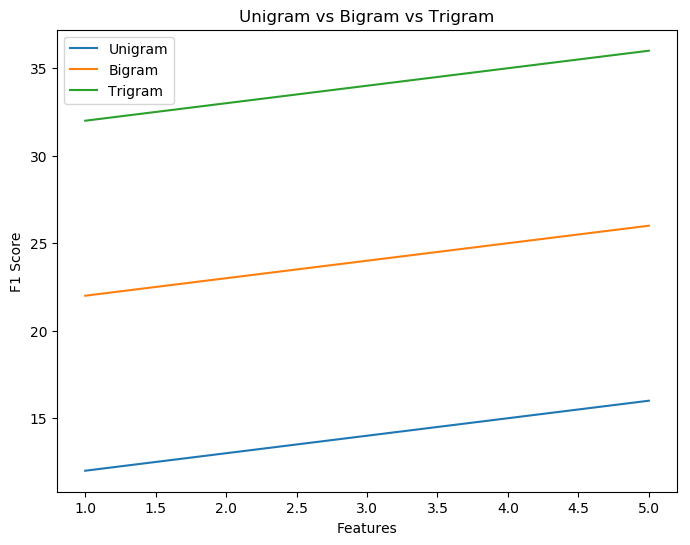

In [54]:
f=[1,2,3,4,5]
arr1=[12,13,14,15,16]
arr2=[22,23,24,25,26]
arr3=[32,33,34,35,36]

plt.figure(figsize=(8,6))
plt.plot(f, arr1, label='Unigram')
plt.plot(f, arr2, label='Bigram')
plt.plot(f, arr3, label='Trigram')
# plt.plot(f, arr[3], label='Quadgram')
# plt.plot(f, arr[4], label='Pentagram')
plt.title("Unigram vs Bigram vs Trigram")
plt.xlabel("Features")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

In [76]:
len(features)

6853